# __Telco Customer Churn Prediction__

The notebook is from Kaggle dataset.

In [5]:
#!pip install kaggle

#!pip install unzip

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1287 sha256=02844c2946c60e9839ed0eef84c8aa858410d1f18e9ad8d0e133b39254b3fae1
  Stored in directory: c:\users\arunita\appdata\local\pip\cache\wheels\5a\3d\8a\1ff7948c2e5c4ba8032812825fa2d4bb86e5ba92f2b07677ea
Successfully built unzip


In [2]:
# kaggle.json - contains the kaggle API key
# below will work okay if the json is in the same file

import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

__Download dataset using kaggle cli__

In [3]:
# download dataset using kaggle cli

!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors




  0%|          | 0.00/172k [00:00<?, ?B/s]
100%|##########| 172k/172k [00:00<00:00, 58.3MB/s]


## __Import packages__

In [39]:
# import all the PACKAGES

import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

__Unzip the file__

In [10]:
# unzip the file

with zipfile.ZipFile("telco-customer-churn.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [11]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# basic dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# number of rows and columns

df.shape

(7043, 21)

In [13]:
# check for missing values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# if there are empty string instead of NULL

(df == ' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# identify and replace empty strings in TotalCharges column

(df['TotalCharges'] == ' ').sum()

11

In [18]:
# convert empty strings to NaN

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)


In [19]:
# convert column to numerc

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [20]:
# check for null after update

df['TotalCharges'].isnull().sum()

11

In [21]:
# drop the null rows since they are considerably lower in count

df.dropna(subset=['TotalCharges'], inplace=True)

In [22]:
# target variable breakdown

df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [23]:
# list categorical columns

cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [24]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
# binary encoding for columns with 2 unique variables
# one-hot encoding for columns with more than 2 unique variables

In [32]:
# identify binary columns

binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
print(binary_cols)

# label encode binary columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [34]:
# one-hot encode multi category columns

df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in binary_cols], drop_first=True)

In [35]:
# shape and preview

print(df.shape)
df.head()

(7032, 7062)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [38]:
# splitting the dataset into train and test

x = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size = 0.2, random_state = 42, stratify = y)

In [40]:
# Identify numeric columns
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])

In [41]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

C:\Users\Arunita\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[918 115]
 [166 208]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

Accuracy: 0.8002842928216063


In [42]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

[[943  90]
 [209 165]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407

Accuracy: 0.7874911158493249


In [43]:
# ROC-AUC
from sklearn.metrics import roc_auc_score

print("LogReg ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("RF ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

LogReg ROC AUC: 0.8358591610541956
RF ROC AUC: 0.8182827650113111


In [44]:
# Model tuning with GridSearchCV - Random Forest Example

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=1
)

grid_rf.fit(X_train,y_train)
print("Best Params:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print(classification_report(y_test,y_pred_best_rf))

Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.67      0.45      0.54       374

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



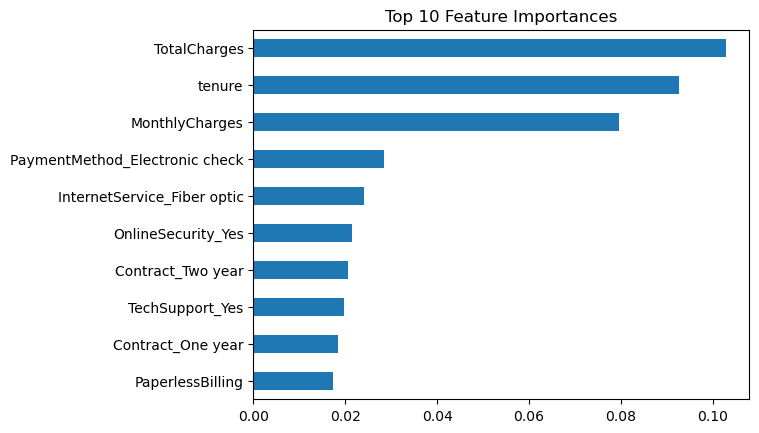

In [48]:
# Model Interpretation

import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [49]:
# SHAP for explainibility

#!pip install shap
#import shap

#explainer = shap.TreeExplainer(best_rf)
#shap_values = explainer.shap_values(X_test)

#shap.summary_plot(shap_values[1], X_test)

     -------------------------------------- 544.3/544.3 kB 8.6 MB/s eta 0:00:00


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 260815212837633087891223676610167177216.000000, while the model output was 0.605000. If this difference is acceptable you can set check_additivity=False to disable this check.

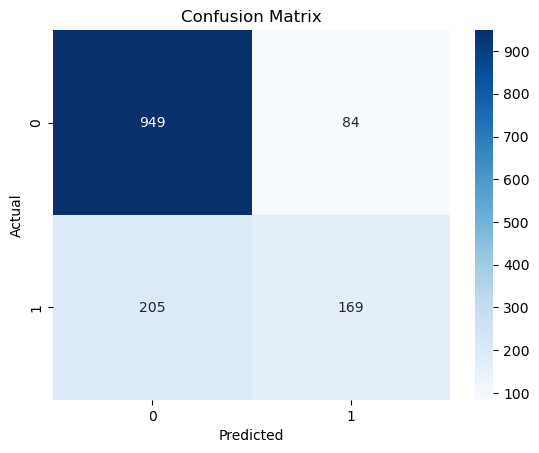

In [53]:
# VISUALS

# Confusion Matrix Heatmap

from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

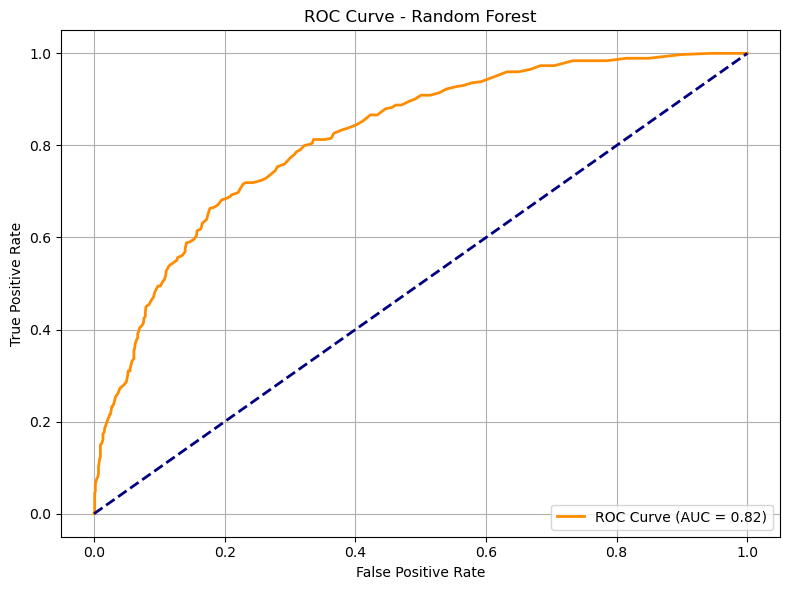

In [56]:
# ROC Curve

from sklearn.metrics import roc_curve, auc

# get predicted probabilities for the positive class
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# calculate false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# plot roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Arunita\anaconda31\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arunita\anaconda31\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


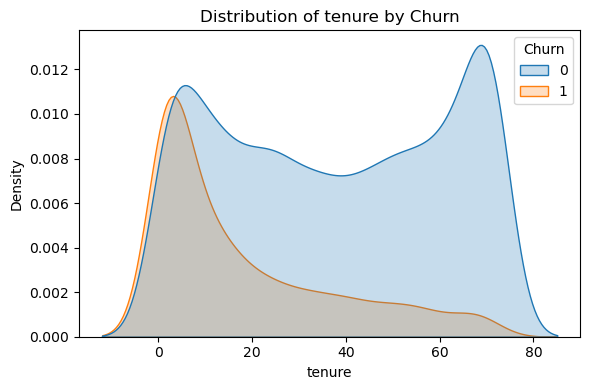

C:\Users\Arunita\anaconda31\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arunita\anaconda31\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


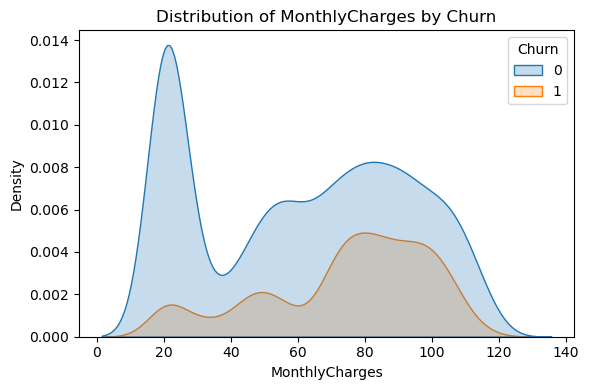

C:\Users\Arunita\anaconda31\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arunita\anaconda31\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


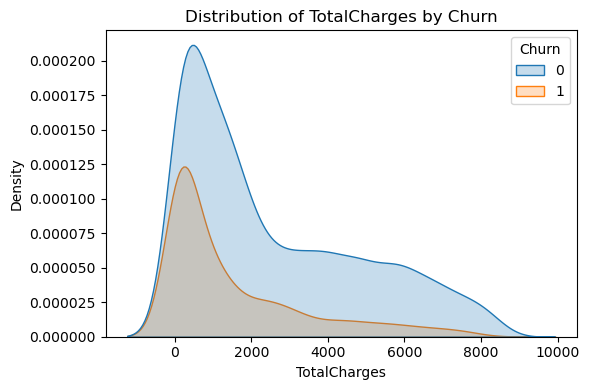

In [59]:
# Exploratory Data Analysis

# Bivariate Analysis by Churn Group

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True)
    plt.title(f"Distribution of {col} by Churn")
    plt.tight_layout()
    plt.show()

In [ ]:
# Churn Rate Across Categorical Features

cat_cols = ['Contract', 'PaymentMethod', 'Internet Service', 'SeniorCitizen']

for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)